In [192]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

pd.set_option("display.max_columns", 1000)

In [193]:

# This survey provided us with 4 performant message models to help us segment the electorate
# -- 2 positive messages in support of Doe and 2 hit messages attacking his opponent, the
# incumbent, Max Smith. The positive messages about Doe promote his positions on healthcare
# (Q3a) and opiates (Q3b) , while the hits against Smith criticize his positions on healthcare
# (Q2a) and taxes (Q2b).


# The IE has budget to do the following:
# ● Persuasion: Contact 75,000 households most likely to be persuaded toward Doe with
# mail over a period of 4 weeks.
# ● Mobilization: Contact 40,000 voters with mobilization mailers over a period of 1 week.
# ● Remodel: Run an additional survey and update our models. This process would take
# approximately 2 weeks.


In [194]:
# The Task

# Your task is as follows:

# ● Design a mail plan for the IE by utilizing the models and voter-information datasets and
# creating audiences most beneficial for targeting. This contact plan should include
# persuasion at the household level and mobilization at the individual voter level.

# ● Create a client-ready presentation describing your targeting recommendations
# and containing any additional information you need to outline your mail plan. The
# intended audience is the IE’s senior leadership.

# While you should include whatever you see fit in your presentation, the client asked for the
# final report to address the following key questions:

# 1. What’s the current state of the race?
# 2. Who are our current persuasion targets? What messages should they receive?
# 3. Who are our current mobilization targets?
# 4. How would you schedule the persuasion, mobilization, and remodeling on a timeline?
# Which models and universes would we update?

### Investigating dataset

In [195]:
vf = pd.read_csv('voter_file.csv')
prob = pd.read_csv('model_probabilities.csv')
hh = pd.read_csv('hh_id.csv')

In [196]:
vf.head()

,id,age,region,gender,generation,language,party,race,religion,education,child_present,hh_count,hh_income,registration_date,marital_status,first_eligible_election,first_eligible_election_bucketed,voted_gen_2008,voted_gen_2010,voted_gen_2012,voted_gen_2014,voted_gen_2016,voted_pri_2008,voted_pri_2010,voted_pri_2012,voted_pri_2014,voted_pri_2016,smith_victory_margin_2016,smith_victory_margin_2016_bucketed
0,6422bb5bba44a30587f8769a3ca733ab,30.0,3_district_northwest,2_male,2_millennial,1_english,1_dem,1_white,1_protestant,NaN,NaN,1_or_2_people,1_45k_or_lower,20060214.0,2_single,vtr_pri06,2_between_04_and_08,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.434104,1_highest_victory_margin
1,72ee9e07020f88c75db38cb0cc843ae1,42.0,1_district_east,2_male,3_gen_x,NaN,2_rep,1_white,NaN,NaN,NaN,NaN,NaN,20030807.0,NaN,vtr_ppp04,2_between_04_and_08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.272943,2_mid_high_victory_margin
2,612fee18a3d6c4779e75541b95d93278,40.0,1_district_east,1_female,2_millennial,1_english,1_dem,1_white,1_protestant,2_completed_college,1.0,3_or_more,3_101k_or_higher,20050608.0,2_single,vtr_gen04,2_between_04_and_08,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.272943,2_mid_high_victory_margin
3,2cdf787f7b8ea56bca6b2cbdb0ee3909,44.0,1_district_east,2_male,3_gen_x,1_english,2_rep,1_white,1_protestant,NaN,1.0,3_or_more,3_101k_or_higher,20070918.0,2_single,vtr_gen04,2_between_04_and_08,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.272943,2_mid_high_victory_margin
4,fd89af904a5f5cff47268d41f89680b1,54.0,1_district_east,2_male,1_baby_boomer,NaN,2_rep,1_white,NaN,NaN,NaN,NaN,NaN,20080701.0,NaN,vtr_gen08,2_between_04_and_08,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
vf.groupby('first_eligible_election').count()['age']
#first_eligible_election_bucketed

first_eligible_election
vtr_gen02     11298
vtr_gen04     40094
vtr_gen06      9296
vtr_gen08     19856
vtr_gen10      6756
vtr_gen12     16778
vtr_gen14      9961
vtr_gen16     43155
vtr_ppp04     18930
vtr_ppp08     22774
vtr_ppp12     18108
vtr_ppp16     24093
vtr_pri02    204641
vtr_pri06     19833
vtr_pri10     14830
vtr_pri14     17144
Name: age, dtype: int64

In [198]:
prob.head()

,id,ballot_movement__constant_smith_doe_voter,ballot_movement__not_constant_smith_doe_voter,q01_initial_ballot_test__doe,q01_initial_ballot_test__smith,q02a_smith_repeal_obamacare__serious_doubts,q02a_smith_repeal_obamacare__no_doubts,q02b_smith_gop_tax_plan__serious_doubts,q02b_smith_gop_tax_plan__no_doubts,q03a_doe_healthcare_right__very_convincing,q03a_doe_healthcare_right__no_difference,q03b_doe_end_opioid_crisis__very_convincing,q03b_doe_end_opioid_crisis__no_difference,q04_informed_ballot_test__1_doe,q04_informed_ballot_test__2_smith
0,70634d3bd2844ed28d750e35869cc1ba,0.844406,0.155594,0.159187,0.840813,0.240730,0.759270,0.228516,0.771484,0.132727,0.867273,0.194461,0.805539,0.166754,0.833246
1,457a17d4aab0f2c627874eb31de40f7e,0.863531,0.136469,0.599505,0.400495,0.460981,0.539019,0.622177,0.377823,0.617281,0.382719,0.585382,0.414618,0.749239,0.250761
2,b16661a25d84b9e3cbffbe1a45881d7a,0.869160,0.130840,0.667830,0.332170,0.668428,0.331572,0.699353,0.300647,0.693477,0.306523,0.697538,0.302462,0.750401,0.249599
3,3bd606038638fb1fc0f8096f1dad7ba3,0.844666,0.155334,0.671982,0.328018,0.653759,0.346241,0.728707,0.271293,0.699104,0.300896,0.697639,0.302361,0.756100,0.243900
4,347335e823c62972faceeced25924e3d,0.861219,0.138781,0.560259,0.439741,0.646425,0.353575,0.643168,0.356832,0.595939,0.404061,0.655440,0.344560,0.597617,0.402383


In [199]:
vf = vf.set_index('id')
prob = prob.set_index('id')
hh = hh.set_index('id')

In [200]:
prob.sum()

ballot_movement__constant_smith_doe_voter        395511.665831
ballot_movement__not_constant_smith_doe_voter    102037.334169
q01_initial_ballot_test__doe                     248231.162114
q01_initial_ballot_test__smith                   249317.837886
q02a_smith_repeal_obamacare__serious_doubts      256312.190349
q02a_smith_repeal_obamacare__no_doubts           241236.809651
q02b_smith_gop_tax_plan__serious_doubts          277600.199238
q02b_smith_gop_tax_plan__no_doubts               219948.800762
q03a_doe_healthcare_right__very_convincing       260309.893734
q03a_doe_healthcare_right__no_difference         237239.106266
q03b_doe_end_opioid_crisis__very_convincing      246440.548952
q03b_doe_end_opioid_crisis__no_difference        251108.451048
q04_informed_ballot_test__1_doe                  293596.712870
q04_informed_ballot_test__2_smith                203952.287130
dtype: float64

Support numbers indicate smith ~1000 votes ahead, while significant movement in favor of Doe takes place after an information campaign, but this does *not* account for turnout, which we will address in a later section with a model

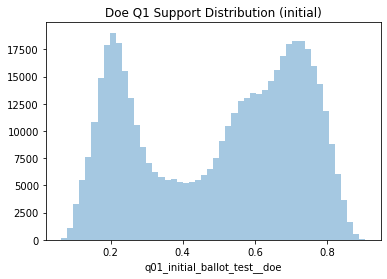

In [201]:
f = sns.distplot(prob.q01_initial_ballot_test__doe,kde=False)
f.set_title('Doe Q1 Support Distribution (initial)')
plt.show()

Very bimodal distribution implies a nice split we can target > 0.4

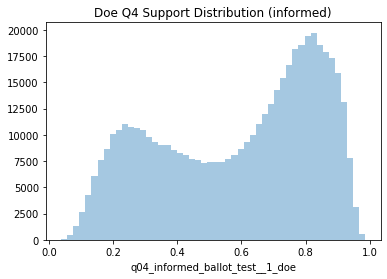

In [202]:
f = sns.distplot(prob.q04_informed_ballot_test__1_doe,kde=False)
f.set_title('Doe Q4 Support Distribution (informed)')
plt.show()

Persuasion/information campaign proves to be effective, as can be seen by reduced peak < 0.4 and increased volume in the 0.4-0.6 range

### Creating turnout model features/variables

In [203]:
vote_cols = [c for c in vf.columns if 'voted' in c]
vf[vote_cols] = vf[vote_cols].fillna(0)

In [204]:
vf['first_election_year_eligible'] = ('20' + vf.first_eligible_election.str.extract(r'([0-9]{2})')).astype(int)

In [205]:
feats = pd.get_dummies(vf)
feats = feats.merge(prob,left_index=True,right_index=True,how='inner')

In [206]:
def depvar(e12,e14,e16):
    
    if (e12 == 1):
        return 1
    elif (e14 == 1):
        return 1
    elif (e16 == 1):
        return 1
    else:
        return 0

In [207]:
feats['y'] = feats.apply(lambda row: depvar(row['voted_gen_2012'],row['voted_gen_2014'],row['voted_gen_2016']),axis=1)

In [208]:
drop = [ c for c in feats.columns if (
    ('first_eligible_election' in c) or
    ('voted' in c) 
)    
]

In [209]:
feats = feats.drop(columns=drop)

In [210]:
# Assuming NA values for child_present mean they don't have a child, since max/min values are the same for this variable
# Pad nulls with median elsewhere
feats['child_present'] = feats.child_present.fillna(0)
feats['smith_victory_margin_2016'] = feats.smith_victory_margin_2016.fillna(feats.smith_victory_margin_2016.median())
feats['registration_date'] = feats.registration_date.fillna(feats.registration_date.median())
feats['age'] = feats.age.fillna(feats.age.median())

In [211]:
#Scaling all values down to <= 1 for standardization & controlling for regularization later -- want to keep distributions still

for c in feats.columns:
    feats[c] = feats[c]/feats[c].max()

In [212]:
sample = feats.sample(50000)
sample2 = feats.sample(100000)

y_sample = sample.y
X_sample = sample.drop(columns='y')

y_sample2 = sample2.y
X_sample2 = sample2.drop(columns='y')

y = feats.y
X = feats.drop(columns = 'y')

### Training model

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [46]:

grid = {
    
    "C": [0.01,0.1]
}

lr = LogisticRegression(penalty='l1',class_weight = 'balanced',solver = 'liblinear')
search = GridSearchCV(lr,grid,cv=5,scoring='f1',n_jobs=-1)
search.fit(X_sample,y_sample)
print(search.best_params_)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effective_n_jobs(self.n_jobs) != 1:
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1541: UserWarning: Multiprocessing-backed parallel loops cannot be nested, setting n_jobs=1
  if effect

{'C': 0.1}


In [215]:
y_sample2.value_counts()

1.0    69476
0.0    30524
Name: y, dtype: int64

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#using dataset to expedite training
X_train, X_test, y_train, y_test = train_test_split(X_sample2, y_sample2, test_size=0.25, stratify=y_sample2)

logreg = LogisticRegression(penalty='l1',C=0.1,class_weight='balanced')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
print('AUC is {}'.format(metrics.auc(fpr, tpr)))
print('F1 is {}'.format(metrics.f1_score(y_test,y_pred)))
print('Precision is {}'.format(metrics.precision_score(y_test,y_pred)))
print('Recall is {}'.format(metrics.recall_score(y_test,y_pred)))

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.81492
AUC is 0.8248879556593773
F1 is 0.8571604976383786
Precision is 0.9240548455804047
Recall is 0.7992975991709367


In [217]:
loadings = pd.DataFrame({'factor':list(X.columns),'weight':logreg.coef_.tolist()[0]}).sort_values(by='weight',ascending=False).set_index('factor')
loadings

,weight
factor,
q01_initial_ballot_test__doe,12.721959
q03b_doe_end_opioid_crisis__no_difference,7.938045
q02a_smith_repeal_obamacare__no_doubts,7.708029
q03a_doe_healthcare_right__very_convincing,5.254717
q04_informed_ballot_test__2_smith,4.546299
age,4.014237
smith_victory_margin_2016,1.292102
party_2_rep,1.102467
region_3_district_northwest,0.992474


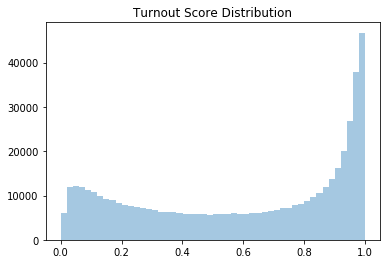

In [240]:
predictions = logreg.predict_proba(X)
turnout_scores = pd.DataFrame(predictions[:,1],columns=['turnout_score'],index=X.index)
f = sns.distplot(turnout_scores,kde=False)
f.set_title('Turnout Score Distribution')
plt.show()

In [241]:
turnout_scores.head()

,turnout_score
id,
6422bb5bba44a30587f8769a3ca733ab,0.289552
72ee9e07020f88c75db38cb0cc843ae1,0.064301
612fee18a3d6c4779e75541b95d93278,0.883765
2cdf787f7b8ea56bca6b2cbdb0ee3909,0.856079
fd89af904a5f5cff47268d41f89680b1,0.050811


In [242]:
turnout_scores.sum()

turnout_score    295871.785528
dtype: float64

In [243]:
vals = turnout_scores.copy()
vals = vals.merge(vf[['voted_gen_2012','voted_gen_2014','voted_gen_2016']],left_index=True,right_index=True,how='inner')

In [244]:
vals['percentile'] = vals.turnout_score.rank(pct=True)
vals['bucket'] = pd.cut(vals.percentile,[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]).astype(str)
vals['elections_voted'] = vals.voted_gen_2012 + vals.voted_gen_2014 + vals.voted_gen_2016

In [245]:
vals.groupby('bucket').mean()['elections_voted']

bucket
(0.0, 0.1]    0.200728
(0.1, 0.2]    0.421385
(0.2, 0.3]    0.710160
(0.3, 0.4]    1.070566
(0.4, 0.5]    1.457039
(0.5, 0.6]    1.864456
(0.6, 0.7]    2.218953
(0.7, 0.8]    2.483871
(0.8, 0.9]    2.675410
(0.9, 1.0]    2.809044
Name: elections_voted, dtype: float64

In [246]:
### validates well in addition to AUC/F1 etc criteria

In [247]:
vals.shape

(497549, 7)

### Current State of Race

In [248]:
s = prob.merge(turnout_scores,how='inner',left_index=True,right_index=True)

In [249]:
print(s.sum()['q01_initial_ballot_test__doe'])
print(s.sum()['q01_initial_ballot_test__smith'])
# Support-wise, Smith is ahead narrowly by ~ 1100 votes

248231.16211410196
249317.83788589807


In [250]:
s['proj_vote_share_doe'] = s.q01_initial_ballot_test__doe * s.turnout_score
s['proj_vote_share_smith'] = s.q01_initial_ballot_test__smith * s.turnout_score
print(s.sum()['proj_vote_share_doe'])
print(s.sum()['proj_vote_share_smith'])
# Weighting for projected turnout, Doe is ahead by ~ 1400

148681.67176291707
147190.11376490686


In [287]:
s.turnout_score.sum()

295871.78552782355

In [251]:
turnout_scores.reset_index().to_csv('turnout_scores.csv')

### Persuasion Targets

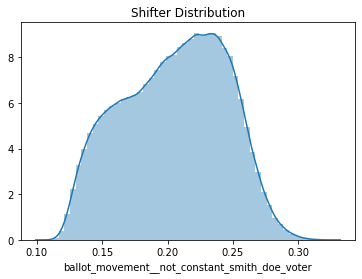

In [253]:
f = sns.distplot(prob.ballot_movement__not_constant_smith_doe_voter)
f.set_title('Shifter Distribution')
plt.show()

In [254]:
persuasion = prob.merge(hh,how='inner',left_index=True,right_index=True)
persuasion = persuasion.merge(turnout_scores,how='inner',left_index=True,right_index=True)
hh_persuasion = persuasion.groupby('hh_id').mean()

In [255]:
hh_persuasion.describe()

,ballot_movement__constant_smith_doe_voter,ballot_movement__not_constant_smith_doe_voter,q01_initial_ballot_test__doe,q01_initial_ballot_test__smith,q02a_smith_repeal_obamacare__serious_doubts,q02a_smith_repeal_obamacare__no_doubts,q02b_smith_gop_tax_plan__serious_doubts,q02b_smith_gop_tax_plan__no_doubts,q03a_doe_healthcare_right__very_convincing,q03a_doe_healthcare_right__no_difference,q03b_doe_end_opioid_crisis__very_convincing,q03b_doe_end_opioid_crisis__no_difference,q04_informed_ballot_test__1_doe,q04_informed_ballot_test__2_smith,turnout_score
count,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000,318020.000000
mean,0.790968,0.209032,0.507106,0.492894,0.522806,0.477194,0.568535,0.431465,0.532119,0.467881,0.505490,0.494510,0.598673,0.401327,0.558556
std,0.037931,0.037931,0.220894,0.220894,0.182439,0.182439,0.187563,0.187563,0.233269,0.233269,0.193866,0.193866,0.241604,0.241604,0.323119
min,0.678758,0.108903,0.062945,0.093657,0.156599,0.117303,0.090679,0.025214,0.033292,0.019670,0.155774,0.181031,0.038046,0.015021,0.000454
25%,0.760770,0.180344,0.274263,0.297590,0.357295,0.325366,0.399041,0.282587,0.318575,0.269515,0.297341,0.310188,0.390118,0.192384,0.251537
50%,0.787802,0.212198,0.551279,0.448721,0.567709,0.432291,0.609120,0.390880,0.572450,0.427550,0.537021,0.462979,0.652985,0.347015,0.591351
75%,0.819656,0.239230,0.702410,0.725737,0.674634,0.642705,0.717413,0.600959,0.730485,0.681425,0.689812,0.702659,0.807616,0.609882,0.875115
max,0.891097,0.321242,0.906343,0.937055,0.882697,0.843401,0.974786,0.909321,0.980330,0.966708,0.818969,0.844226,0.984979,0.961954,0.999727


In [256]:
# Taking top 50% of people who're likely to change their vote preference and top 50% of folks who initially supported Smith 
# to target for persuasion ... can drop the q01_initial_ballot_test__smith floor to hit 75,000 households
targets = hh_persuasion.loc[(hh_persuasion.ballot_movement__not_constant_smith_doe_voter > 0.212198) & (hh_persuasion.q01_initial_ballot_test__smith > 0.448721)]
targets.shape

(73199, 15)

In [257]:
sub = pd.get_dummies(vf)

sub['child_present'] = sub.child_present.fillna(0)
sub['smith_victory_margin_2016'] = sub.smith_victory_margin_2016.fillna(sub.smith_victory_margin_2016.median())
sub['registration_date'] = sub.registration_date.fillna(sub.registration_date.median())
sub['age'] = sub.age.fillna(sub.age.median())
sub = sub.merge(hh,how='inner',left_index=True,right_index=True)

In [258]:
persuasion_demos = targets.merge(sub,how='inner',left_index=True,right_on = 'hh_id')

In [259]:
demos = persuasion.merge(sub.drop(columns='hh_id'),how='inner',left_index=True,right_index=True)

In [263]:
demos.describe()

,ballot_movement__constant_smith_doe_voter,ballot_movement__not_constant_smith_doe_voter,q01_initial_ballot_test__doe,q01_initial_ballot_test__smith,q02a_smith_repeal_obamacare__serious_doubts,q02a_smith_repeal_obamacare__no_doubts,q02b_smith_gop_tax_plan__serious_doubts,q02b_smith_gop_tax_plan__no_doubts,q03a_doe_healthcare_right__very_convincing,q03a_doe_healthcare_right__no_difference,q03b_doe_end_opioid_crisis__very_convincing,q03b_doe_end_opioid_crisis__no_difference,q04_informed_ballot_test__1_doe,q04_informed_ballot_test__2_smith,turnout_score,age,child_present,registration_date,voted_gen_2008,voted_gen_2010,voted_gen_2012,voted_gen_2014,voted_gen_2016,voted_pri_2008,voted_pri_2010,voted_pri_2012,voted_pri_2014,voted_pri_2016,smith_victory_margin_2016,first_election_year_eligible,region_1_district_east,region_2_district_south,region_3_district_northwest,region_4_district_center,gender_1_female,gender_2_male,generation_1_baby_boomer,generation_2_millennial,generation_3_gen_x,language_1_english,language_2_other,party_1_dem,party_2_rep,party_3_other,race_1_white,race_2_other,religion_1_protestant,religion_2_catholic,religion_3_other,education_1_completed_high_school,education_2_completed_college,education_3_completed_grad_school,education_4_attended_vocational,hh_count_1_or_2_people,hh_count_3_or_more,hh_income_1_45k_or_lower,hh_income_2_46k-100k,hh_income_3_101k_or_higher,marital_status_1_married,marital_status_2_single,first_eligible_election_vtr_gen02,first_eligible_election_vtr_gen04,first_eligible_election_vtr_gen06,first_eligible_election_vtr_gen08,first_eligible_election_vtr_gen10,first_eligible_election_vtr_gen12,first_eligible_election_vtr_gen14,first_eligible_election_vtr_gen16,first_eligible_election_vtr_ppp04,first_eligible_election_vtr_ppp08,first_eligible_election_vtr_ppp12,first_eligible_election_vtr_ppp16,first_eligible_election_vtr_pri02,first_eligible_election_vtr_pri06,first_eligible_election_vtr_pri10,first_eligible_election_vtr_pri14,first_eligible_election_bucketed_1_02_or_before,first_eligible_election_bucketed_2_between_04_and_08,first_eligible_election_bucketed_3_after_08,smith_victory_margin_2016_bucketed_1_highest_victory_margin,smith_victory_margin_2016_bucketed_2_mid_high_victory_margin,smith_victory_margin_2016_bucketed_3_mid_low_victory_margin,smith_victory_margin_2016_bucketed_4_lowest_victory_margin
count,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,4.975490e+05,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.000000,497549.00000
mean,0.794920,0.205080,0.498908,0.501092,0.515150,0.484850,0.557935,0.442065,0.523184,0.476816,0.495309,0.504691,0.590086,0.409914,0.594659,48.533560,0.395513,2.002651e+07,0.487936,0.383781,0.534462,0.445182,0.611520,0.245821,0.253621,0.126508,0.259948,0.225682,0.221043,2006.579698,0.207684,0.183570,0.160678,0.448068,0.527948,0.472052,0.305534,0.384328,0.205686,0.685325,0.008922,0.540797,0.368040,0.091163,0.880755,0.048622,0.572368,0.096541,0.024623,0.

In [266]:
demos.describe()[['turnout_score','q01_initial_ballot_test__doe']]

,turnout_score,q01_initial_ballot_test__doe
count,497549.000000,497549.000000
mean,0.594659,0.498908
std,0.338059,0.223454
min,0.000327,0.062945
25%,0.263173,0.261516
50%,0.670732,0.551998
75%,0.927817,0.697094
max,0.999937,0.906343


In [286]:
mobilization = demos.loc[ (demos.turnout_score > 0.263173) & (demos.turnout_score < 0.927817) & (demos.q01_initial_ballot_test__doe > 0.697094) & (demos.ballot_movement__constant_smith_doe_voter > 0.76525)]
mobilization.count()

ballot_movement__constant_smith_doe_voter                       40069
ballot_movement__not_constant_smith_doe_voter                   40069
q01_initial_ballot_test__doe                                    40069
q01_initial_ballot_test__smith                                  40069
q02a_smith_repeal_obamacare__serious_doubts                     40069
q02a_smith_repeal_obamacare__no_doubts                          40069
q02b_smith_gop_tax_plan__serious_doubts                         40069
q02b_smith_gop_tax_plan__no_doubts                              40069
q03a_doe_healthcare_right__very_convincing                      40069
q03a_doe_healthcare_right__no_difference                        40069
q03b_doe_end_opioid_crisis__very_convincing                     40069
q03b_doe_end_opioid_crisis__no_difference                       40069
q04_informed_ballot_test__1_doe                                 40069
q04_informed_ballot_test__2_smith                               40069
hh_id               

In [260]:
demos.loc[(demos.q01_initial_ballot_test__doe > 0.697094)].describe()

,ballot_movement__constant_smith_doe_voter,ballot_movement__not_constant_smith_doe_voter,q01_initial_ballot_test__doe,q01_initial_ballot_test__smith,q02a_smith_repeal_obamacare__serious_doubts,q02a_smith_repeal_obamacare__no_doubts,q02b_smith_gop_tax_plan__serious_doubts,q02b_smith_gop_tax_plan__no_doubts,q03a_doe_healthcare_right__very_convincing,q03a_doe_healthcare_right__no_difference,q03b_doe_end_opioid_crisis__very_convincing,q03b_doe_end_opioid_crisis__no_difference,q04_informed_ballot_test__1_doe,q04_informed_ballot_test__2_smith,turnout_score,age,child_present,registration_date,voted_gen_2008,voted_gen_2010,voted_gen_2012,voted_gen_2014,voted_gen_2016,voted_pri_2008,voted_pri_2010,voted_pri_2012,voted_pri_2014,voted_pri_2016,smith_victory_margin_2016,first_election_year_eligible,region_1_district_east,region_2_district_south,region_3_district_northwest,region_4_district_center,gender_1_female,gender_2_male,generation_1_baby_boomer,generation_2_millennial,generation_3_gen_x,language_1_english,language_2_other,party_1_dem,party_2_rep,party_3_other,race_1_white,race_2_other,religion_1_protestant,religion_2_catholic,religion_3_other,education_1_completed_high_school,education_2_completed_college,education_3_completed_grad_school,education_4_attended_vocational,hh_count_1_or_2_people,hh_count_3_or_more,hh_income_1_45k_or_lower,hh_income_2_46k-100k,hh_income_3_101k_or_higher,marital_status_1_married,marital_status_2_single,first_eligible_election_vtr_gen02,first_eligible_election_vtr_gen04,first_eligible_election_vtr_gen06,first_eligible_election_vtr_gen08,first_eligible_election_vtr_gen10,first_eligible_election_vtr_gen12,first_eligible_election_vtr_gen14,first_eligible_election_vtr_gen16,first_eligible_election_vtr_ppp04,first_eligible_election_vtr_ppp08,first_eligible_election_vtr_ppp12,first_eligible_election_vtr_ppp16,first_eligible_election_vtr_pri02,first_eligible_election_vtr_pri06,first_eligible_election_vtr_pri10,first_eligible_election_vtr_pri14,first_eligible_election_bucketed_1_02_or_before,first_eligible_election_bucketed_2_between_04_and_08,first_eligible_election_bucketed_3_after_08,smith_victory_margin_2016_bucketed_1_highest_victory_margin,smith_victory_margin_2016_bucketed_2_mid_high_victory_margin,smith_victory_margin_2016_bucketed_3_mid_low_victory_margin,smith_victory_margin_2016_bucketed_4_lowest_victory_margin
count,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,1.243870e+05,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.0,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000,124387.000000
mean,0.783012,0.216988,0.760686,0.239314,0.723567,0.276433,0.750100,0.249900,0.792948,0.207052,0.707303,0.292697,0.850613,0.149387,0.616316,43.489907,0.327293,2.004449e+07,0.497914,0.382178,0.555765,0.463690,0.649304,0.336932,0.254223,0.141084,0.273525,0.374878,0.050544,2007.288639,0.198944,0.125375,0.002002,0.673680,0.610779,0.389221,0.243900,0.512570,0.190751,0.603584,0.012405,0.995860,0.0,0.004140,0.805357,0.072475,0.500808,0.086255,0.028042,0.104006,0.

In [261]:
demos.loc[(demos.q01_initial_ballot_test__smith > 0.738484)].describe()

,ballot_movement__constant_smith_doe_voter,ballot_movement__not_constant_smith_doe_voter,q01_initial_ballot_test__doe,q01_initial_ballot_test__smith,q02a_smith_repeal_obamacare__serious_doubts,q02a_smith_repeal_obamacare__no_doubts,q02b_smith_gop_tax_plan__serious_doubts,q02b_smith_gop_tax_plan__no_doubts,q03a_doe_healthcare_right__very_convincing,q03a_doe_healthcare_right__no_difference,q03b_doe_end_opioid_crisis__very_convincing,q03b_doe_end_opioid_crisis__no_difference,q04_informed_ballot_test__1_doe,q04_informed_ballot_test__2_smith,turnout_score,age,child_present,registration_date,voted_gen_2008,voted_gen_2010,voted_gen_2012,voted_gen_2014,voted_gen_2016,voted_pri_2008,voted_pri_2010,voted_pri_2012,voted_pri_2014,voted_pri_2016,smith_victory_margin_2016,first_election_year_eligible,region_1_district_east,region_2_district_south,region_3_district_northwest,region_4_district_center,gender_1_female,gender_2_male,generation_1_baby_boomer,generation_2_millennial,generation_3_gen_x,language_1_english,language_2_other,party_1_dem,party_2_rep,party_3_other,race_1_white,race_2_other,religion_1_protestant,religion_2_catholic,religion_3_other,education_1_completed_high_school,education_2_completed_college,education_3_completed_grad_school,education_4_attended_vocational,hh_count_1_or_2_people,hh_count_3_or_more,hh_income_1_45k_or_lower,hh_income_2_46k-100k,hh_income_3_101k_or_higher,marital_status_1_married,marital_status_2_single,first_eligible_election_vtr_gen02,first_eligible_election_vtr_gen04,first_eligible_election_vtr_gen06,first_eligible_election_vtr_gen08,first_eligible_election_vtr_gen10,first_eligible_election_vtr_gen12,first_eligible_election_vtr_gen14,first_eligible_election_vtr_gen16,first_eligible_election_vtr_ppp04,first_eligible_election_vtr_ppp08,first_eligible_election_vtr_ppp12,first_eligible_election_vtr_ppp16,first_eligible_election_vtr_pri02,first_eligible_election_vtr_pri06,first_eligible_election_vtr_pri10,first_eligible_election_vtr_pri14,first_eligible_election_bucketed_1_02_or_before,first_eligible_election_bucketed_2_between_04_and_08,first_eligible_election_bucketed_3_after_08,smith_victory_margin_2016_bucketed_1_highest_victory_margin,smith_victory_margin_2016_bucketed_2_mid_high_victory_margin,smith_victory_margin_2016_bucketed_3_mid_low_victory_margin,smith_victory_margin_2016_bucketed_4_lowest_victory_margin
count,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,1.243880e+05,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000
mean,0.798611,0.201389,0.194471,0.805529,0.277084,0.722916,0.319069,0.680931,0.216440,0.783560,0.245963,0.754037,0.260854,0.739146,0.585215,50.270959,0.402426,2.003616e+07,0.491792,0.395504,0.548638,0.444641,0.615775,0.140737,0.240329,0.132030,0.244236,0.148511,0.307553,2006.576101,0.221894,0.261689,0.161085,0.355332,0.487434,0.512566,0.323206,0.326824,0.235802,0.689737,0.006231,0.000008,0.998754,0.001238,0.921367,0.032246,0.574605,0.099302,0.021280,0

In [262]:
cols = demos.columns
persuasion_demos[cols].describe()

,ballot_movement__constant_smith_doe_voter,ballot_movement__not_constant_smith_doe_voter,q01_initial_ballot_test__doe,q01_initial_ballot_test__smith,q02a_smith_repeal_obamacare__serious_doubts,q02a_smith_repeal_obamacare__no_doubts,q02b_smith_gop_tax_plan__serious_doubts,q02b_smith_gop_tax_plan__no_doubts,q03a_doe_healthcare_right__very_convincing,q03a_doe_healthcare_right__no_difference,q03b_doe_end_opioid_crisis__very_convincing,q03b_doe_end_opioid_crisis__no_difference,q04_informed_ballot_test__1_doe,q04_informed_ballot_test__2_smith,turnout_score,age,child_present,registration_date,voted_gen_2008,voted_gen_2010,voted_gen_2012,voted_gen_2014,voted_gen_2016,voted_pri_2008,voted_pri_2010,voted_pri_2012,voted_pri_2014,voted_pri_2016,smith_victory_margin_2016,first_election_year_eligible,region_1_district_east,region_2_district_south,region_3_district_northwest,region_4_district_center,gender_1_female,gender_2_male,generation_1_baby_boomer,generation_2_millennial,generation_3_gen_x,language_1_english,language_2_other,party_1_dem,party_2_rep,party_3_other,race_1_white,race_2_other,religion_1_protestant,religion_2_catholic,religion_3_other,education_1_completed_high_school,education_2_completed_college,education_3_completed_grad_school,education_4_attended_vocational,hh_count_1_or_2_people,hh_count_3_or_more,hh_income_1_45k_or_lower,hh_income_2_46k-100k,hh_income_3_101k_or_higher,marital_status_1_married,marital_status_2_single,first_eligible_election_vtr_gen02,first_eligible_election_vtr_gen04,first_eligible_election_vtr_gen06,first_eligible_election_vtr_gen08,first_eligible_election_vtr_gen10,first_eligible_election_vtr_gen12,first_eligible_election_vtr_gen14,first_eligible_election_vtr_gen16,first_eligible_election_vtr_ppp04,first_eligible_election_vtr_ppp08,first_eligible_election_vtr_ppp12,first_eligible_election_vtr_ppp16,first_eligible_election_vtr_pri02,first_eligible_election_vtr_pri06,first_eligible_election_vtr_pri10,first_eligible_election_vtr_pri14,first_eligible_election_bucketed_1_02_or_before,first_eligible_election_bucketed_2_between_04_and_08,first_eligible_election_bucketed_3_after_08,smith_victory_margin_2016_bucketed_1_highest_victory_margin,smith_victory_margin_2016_bucketed_2_mid_high_victory_margin,smith_victory_margin_2016_bucketed_3_mid_low_victory_margin,smith_victory_margin_2016_bucketed_4_lowest_victory_margin
count,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,1.074690e+05,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.00000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000,107469.000000
mean,0.762021,0.237979,0.332156,0.667844,0.377782,0.622218,0.426934,0.573066,0.360844,0.639156,0.347407,0.652593,0.438942,0.561058,0.333081,40.986312,0.271734,2.007923e+07,0.261601,0.143818,0.304171,0.179801,0.387907,0.048414,0.063702,0.028222,0.063851,0.043687,0.188748,2008.538109,0.165899,0.182183,0.133341,0.518577,0.510259,0.489741,0.189831,0.551880,0.232458,0.471187,0.00924,0.147401,0.705943,0.146656,0.855856,0.038132,0.388103,0.071518,0.020313,0.0

In [290]:
(vf.groupby('region').count()/vf.groupby('region').count().sum())['age']

region
1_district_east         0.207685
2_district_south        0.183569
3_district_northwest    0.160678
4_district_center       0.448068
Name: age, dtype: float64